<br></br>

<div style="display: table;">
    <img style="float: left;" src="Google_Play_logo.png" alt="Google Play logo" />     
</div>

*Image Source*: [Google Play Market](https://play.google.com/intl/en_us/badges)

<br> </br>

<div style="display: flex;">
    <h1 style='font-size:40px; text-align: center' > Analysis of Google Play Store Apps</h1>   
</div>
<hr>


<br/>

### [Table of Contents:](#top) 
   1. [Project Description and Its Purpose](#1) <br/>
    &nbsp;&nbsp;&nbsp;&nbsp; A. [Motivation Behind The Project](#1a)<br/>
    &nbsp;&nbsp;&nbsp;&nbsp; B. [Dataset Description](#1b)<br/>
    &nbsp;&nbsp;&nbsp;&nbsp; C. [Overview of Potential Business-Relevant Questions](#1c) <br/> 
    
   2. [Starting with the Project](#2)<br/>
    &nbsp;&nbsp;&nbsp;&nbsp; A. [Getting Data Through API](#2a)      
    &nbsp;&nbsp;&nbsp;&nbsp; B. [Data Cleaning](#2b) <br/>
   
   3. [Data-Driven Approach To Answering The Questions (via Exploratory Data Analysis)](#3)<br/>
    &nbsp;&nbsp;&nbsp;&nbsp; 3.1 [Exploring app categories](#3.1) <br/>
    &nbsp;&nbsp;&nbsp;&nbsp; 3.2 [App Ratings](#3.2)    
    &nbsp;&nbsp;&nbsp;&nbsp; 3.3 [Exploring Price Distribution and App Size](#3.3)<br/>
    &nbsp;&nbsp;&nbsp;&nbsp; 3.5 [Paid vs. Free Apps](#3.4) <br/>
    &nbsp;&nbsp;&nbsp;&nbsp; 3.4 [Sentiment Analysis of User Reviews](#3.5) <br/>
    
    
   

<br> <hr> </br>
<a id="1"></a>
## 1. Project description and its purpose

<a id="1a"></a>
### Motivation Behind The Project

The goal of this project is to do a relatively simple, yet comprehensive analysis of the Android app market via comparing 10,000 apps in Google Play across different categories. As the result, this straightforward and common-sense analysis should give a broad picture of what the situation in Android app market looks like. Those findings in turn might provide some insights for people who are involved in market research or intersted in knowing what strategies to follow in order to launch and sustain a successful app in Android market.


<a id="1b"></a>
### Dataset Description

The [dataset]('https://www.kaggle.com/lava18/google-play-store-apps') for this project is obtained from Kaggle via downloading it using [Kaggle's API](https://www.kaggle.com/docs/api). The reason for downloading data from Kaggle, rather than directly from Google Play Market 
itself is quite simple. Unfortunately, such dataset is not publicly available at Google Play Store. In fact, as the owner of the dataset explains, this dataset was created as the result of web scraping, simply because no such publicly available dataset existed before.

Original dataset contains the following files:
<ul>
<li><code>googleplaystore.csv</code>: Contains essential data about types and characteristics of applications listed in Google Play.</li>
<li><code>googleplaystore_user_reviews.csv</code>: This is a pre-processed dataset that has been additionally equipped (based on actual reviews) with sentiment-related information about apps</li>
</ul>

<a id="1c"></a>
### Overview of Potential Business-Relevant Questions


As I already mentioned earlier, the market analysis conducted in this project is not meant to be very deep and thorough, but is rather intended to provide a reader with resulsts that will give an initial overview of the situation in the market for Android phones. 

Therefore, below I will present a set of common-sense questions that every market-researcher, business intelligence team or potential Google Play market entrant is very likely to ask:

<ol>    
    <li>What kind of apps have the highest market share? </li>
    <li>Is there any specific category (<i>ex: Health, Games, Entertainment</i>) dominating the market?</li>
    <li>Which categories have the fewest the number of apps available?</li>
    <li>What is the average rating accross all apps in the Google Play market?</li>
    <li>Does the size of an app affect its rating? </li>
    <li>Do users really care about system-heavy apps at all or they only prefer having light-weight apps? </li>
    <li>Does the price of an app affect its rating? </li>
    <li>Do users always prefer free apps over paid apps?</li>
</ol>

<br> <hr> </br>
<a id="2"></a>
## 2. Starting With The Project

<a id="2a"></a>
### Getting Data Through Kaggle API

In [1]:
%%capture 
#This cell magic hides the output of the cell. It is done in order to avoid lengthy and unnecessary output 

### Install library required for Kaggle API 
!pip install kaggle

#### **Important!**

Before moving to the next cell, please make sure that you created API Token and downloaded / saved it to a required directory. Otherwise, API will not work. For detailed guidelines and more information about Kaggle's API, please visit [here](https://www.kaggle.com/docs/api).



In [2]:
### Download data to the desired destination
!kaggle datasets download -d lava18/google-play-store-apps --path "D:\Python projects\Android Apps Market Analysis"



  0%|          | 0.00/1.94M [00:00<?, ?B/s]
 51%|#####1    | 1.00M/1.94M [00:00<00:00, 9.09MB/s]
100%|##########| 1.94M/1.94M [00:00<00:00, 10.2MB/s]


Next steps:

<ul>
    <li>Since the file is saved as a zip file, I will unzip it.</li> <br/>

 <li>Additionally, original names of csv files <code>googleplaystore.csv</code> and <code>googleplaystore_user_reviews.csv</code> are too long. Therefore, I will change them to <code>apps.csv</code> and <code>user_reviews.csv</code> respectively </li>
    
</ul>

In [3]:
### Unzip downloaded data
import zipfile
path_to_zip_file = 'D:\Python projects\Android Apps Market Analysis\google-play-store-apps.zip'
directory_to_extract_to = 'D:\Python projects\Android Apps Market Analysis\datasets' 

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_object:
    zip_object.extractall(directory_to_extract_to)
    
### Change csv file names
import os
os.rename('datasets/googleplaystore.csv', 'datasets/apps.csv')
os.rename('datasets/googleplaystore_user_reviews.csv', 'datasets/user_reviews.csv')

In [4]:
import pandas as pd

df_apps = pd.read_csv("datasets/apps.csv")
df_apps = df_apps.drop_duplicates()

display(df_apps.sample(n=5))

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6716,Bullshit! (Free),GAME,2.4,45,4.1M,"10,000+",Free,0,Teen,Card,"August 26, 2016",1.1,4.1 and up
6255,Digital Tourist BH Itinerary,TRAVEL_AND_LOCAL,4.6,19,14M,500+,Free,0,Everyone,Travel & Local,"October 13, 2015",0.9.2,2.2 and up
2293,Acupuncture Assistant,MEDICAL,4.5,492,39M,"10,000+",Paid,$7.99,Everyone,Medical,"April 13, 2018",4.4.5,4.1 and up
10275,Mobile FC,SPORTS,4.1,5015,57M,"100,000+",Free,0,Everyone,Sports,"May 25, 2018",125,4.0.3 and up
3377,Lovely Cute Pink Kitty Cat Keyboard Theme,PERSONALIZATION,4.3,2267,7.2M,"500,000+",Free,0,Everyone,Personalization,"July 9, 2018",6.7.5,4.0.3 and up


In [5]:
# Print the total number of apps
print(f"""Total number of unique apps in the dataset = {df_apps['App'].nunique()} """, '\n')

# Print a concise summary of apps dataframe
print('General information regarding Apps dataframe:', '\n')
print(df_apps.info())

Total number of unique apps in the dataset = 9660  

General information regarding Apps dataframe: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


<a id="2b"></a>
### Data Cleaning

The function <code>df_apps_info()</code>revealed us that columns <code>Installs</code> and <code>Price</code> are *string* objects rather than *numeric* as one would expect. Therefore, to make those columns *numeric*, I will delete all non-numeric items from the values stored inside those two columns.

But before, let us make our job even easier by leaving only those rows inside the column <code>Installs</code>, where string contains at least one digit inside. The reason behind it is that <code>Installs</code> gives us information about the number of installations of a particular app. Therefore, <code>Installs</code> should definitely contain a digit. Everything else that does not satify this criteria can be ignored.

Note that the same cannot be told about column <code>Price</code>, because it can potentially contain values like *Free*, *None* etc.




In [6]:
### Create a list of digits and save them as strings.
ls_string_numbers = [str(number) for number in range(0,10)]

### Select only those rows that contain at least one digit inside a string
df_apps = df_apps[df_apps['Installs'].str.contains('|'.join(ls_string_numbers))]

### Check if 'Price' column contains rows that do not contain even a single number (ex: Free, None, etc.)
print(df_apps[~df_apps['Price'].str.contains('|'.join(ls_string_numbers))].empty)


True


Now, I proceed further with data cleaning. Without doubt, the presence of special characters like [<code> , $ + - M k </code>]  (*or some others*) inside <code>Installs</code> and <code>Price</code> columns is what makes them non-numeric columns. Hence, let us remove them and see if we achieve the desired outcome afterwards.

In [7]:
# List of characters to remove
chars_to_remove = ["+", "-", ",", "$", "M", "k"]

# List of column names to clean
columns_to_clean = ['Installs', 'Price']

for column in columns_to_clean:    
    for char in chars_to_remove:
        df_apps[column] = df_apps[column].astype(str).str.replace(char, '') # Replace a character with an empty string        
    df_apps[column] = pd.to_numeric(df_apps[column]) # Convert columns to a numeric type

<br/>

Column <code>Size</code> is another data of type *object*. Although it makes perfect sense, since it specifies size of an app in *Megabytes* or *Kilobytes*, it is still better to convert them to a **numeric type column**, since <code>Size</code> column will definitely be used in the upcoming analysis.

After looking at the data inside <code>Size</code> column, I arrived to the conclusion that the best way would be to express everything in terms of MB, since this is a standard unit of measure of mobile app's size. Additionally, since their approximate values are unknown, I will replace **"Varies with device"** values with **NaN**. In my opinion this is the best strategy.



In [8]:
import numpy as np

### Encode observations whose values are unknown as missing
df_apps['Size'] = df_apps['Size'].replace("Varies with device",np.nan)
df_apps['Size'] = df_apps['Size'].replace("1,000+",1000)

## Eveything is measured in terms of Mbytes
df_apps['Size'] = df_apps['Size'].str.replace("M","")

## Convert Kbytes into Mbytes
df_apps['Size'] = df_apps['Size'].str.replace("k","/1000")

def convert_from_KB_to_MB(s):
    try:
        return float(s)
    except ValueError:
        num, denom = s.split('/')
        return float(num) / float(denom)
    
df_apps['Size'] = df_apps['Size'].apply(lambda x: convert_from_KB_to_MB(x))

df_apps['Size'] = df_apps['Size'].astype(float).round(2)

In [9]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            8831 non-null   float64
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


<br>
Finally, now data looks much more appropriately than it was before.

<br> <hr> </br>
<a id="3"></a>
## 3. Data-Driven Approach To Answering The Questions (via Exploratory Data Analysis)

<a id="3.1"></a>
### 3.1 Exploring app categories

<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>

<p>This brings us to the following questions:</p>

<ul>
     <li>Which category has the highest share of (active) apps in the market? </li>
     <li>Is there any specific category (<i>ex: Health, Games, Entertainment</i>) dominating the market?</li>
     <li>Which categories have the fewest the number of apps available?</li>
</ul>



Total Number of Unique App Categories: 33 



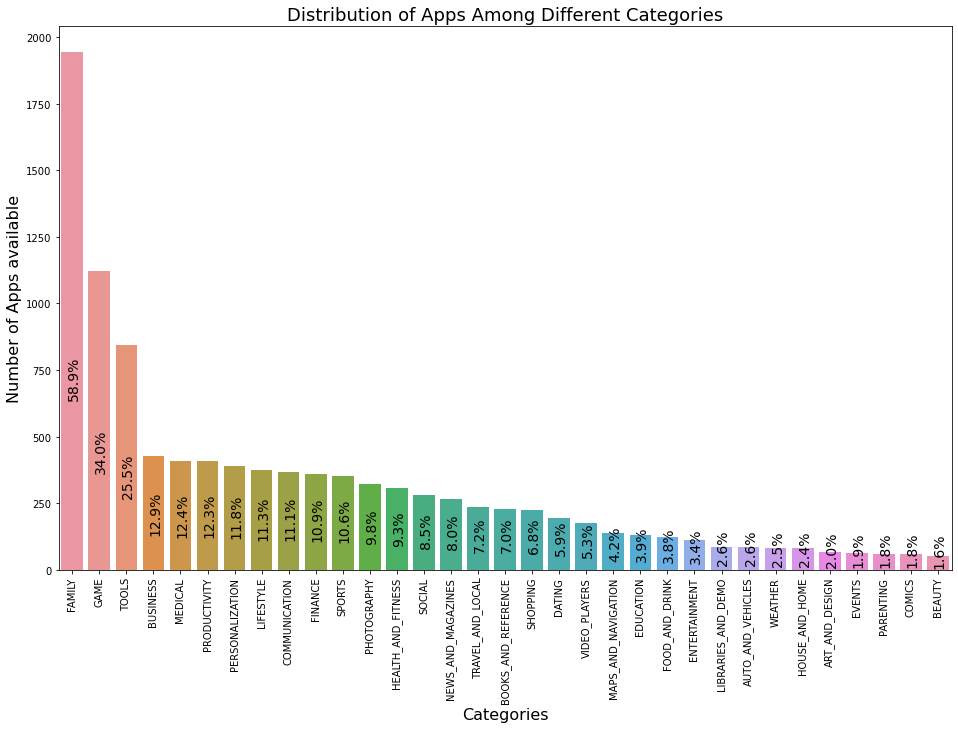

In [10]:
# Import libraries and set up figure size
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))

### Print the total number of unique categories
number_of_categories = len(df_apps['Category'].unique())
print(f"Total Number of Unique App Categories: {number_of_categories}", "\n")

### Count the number of apps in each 'Category' and sort them in descending order
num_of_apps_in_each_category = df_apps['Category'].value_counts().sort_values(ascending = False)

### Plot of the results
plot_apps_in_categories = sns.barplot(
         x = num_of_apps_in_each_category.index,  # index = category name
         y = num_of_apps_in_each_category.values, # value = count for each category
                    )

### This makes the plot to look more appealing
plot_apps_in_categories.set_xticklabels(plot_apps_in_categories.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel(xlabel='Categories', fontsize = 16)
plt.ylabel(ylabel='Number of Apps available', fontsize = 16)
plt.title("Distribution of Apps Among Different Categories", fontsize = 18)

### Let's add percentages to the plot, since this will facilitate interpreation of the findings
def add_percentages(plot, column):
    total = len(column)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(p.get_height()/total)
        x = p.get_x() + p.get_width() / 1.7   # This part defines a horizontal position of the output relative to a respective bar
        y = p.get_y() + p.get_height()/3.0    # This part defines a vertical position of the output relative to a respective bar
        plot.annotate(percentage, (x, y), size = 14,  rotation=90, horizontalalignment='center')
        
add_percentages(plot_apps_in_categories, num_of_apps_in_each_category.values)

### Finally, let us see how the results look like
plt.show()

<br>

Thus, among 33 different app categories present in Google Play Store, <i>Family</i>, <i>Game</i>, <i>Tools</i>, <i>Business</i> and <i>Medical</i> are the top 5 categories that have the highest market prevalence (in a sense that they have the highest share of apps available). On the other hand, apps in <i>Art and Design, Events, Comics, Parenting </i> and <i>Beauty</i> categories have the fewest number of apps available for download.

<br/>
Now, it is turn to explore which categories of apps are the most (and respectively least) popular among end users. To do this, I will calculate the total number of installations of apps accross each cateogry.

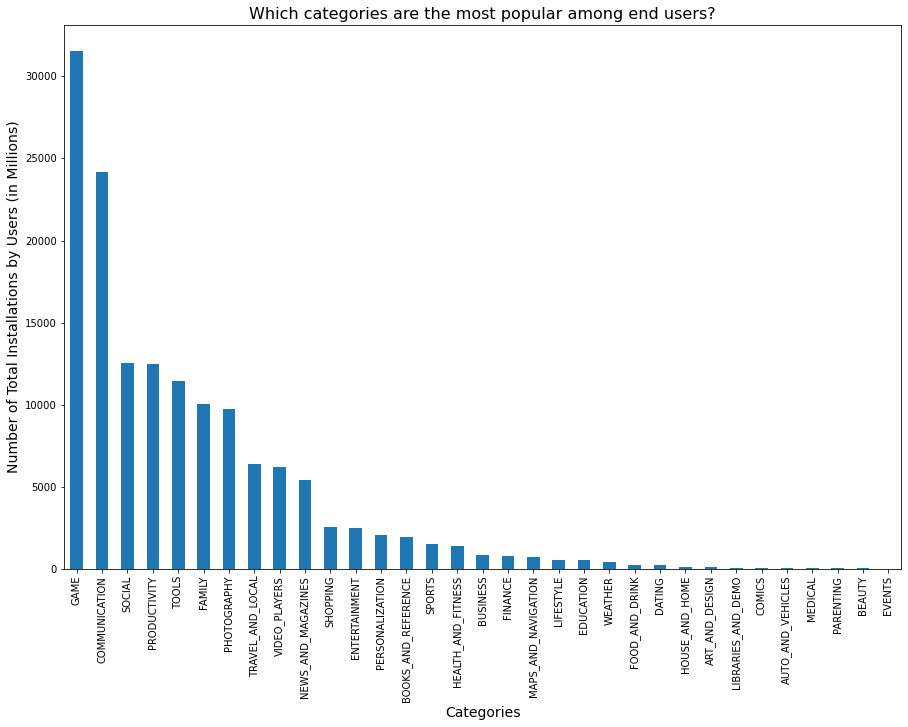

In [11]:
## Calculate the number of installation of all apps inside each category
installs_per_category = df_apps.groupby('Category')['Installs'].sum().sort_values(ascending = False)

# Now, since the resulting numbers are hard to read, I will express them in millions notation.
installs_per_category_per_million = installs_per_category.div(1000_000).round().astype(int)

### Plot of the results
plot_popular_categories = installs_per_category_per_million.plot(kind = 'bar',
                                                                 x = installs_per_category_per_million.index, # value = sum of total installations for each category
                                                                 y = installs_per_category_per_million.values, # index = category name  
                                                                 figsize=(15,10)
                                                                    )

plot_popular_categories.set_xticklabels(plot_popular_categories.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel(xlabel='Categories', fontsize = 14)
plt.ylabel(ylabel='Number of Total Installations by Users (in Millions)', fontsize = 14)
plt.title("Which categories are the most popular among end users?", fontsize = 16)
plt.show()


As the bar plot above suggests, <code>'GAME', 'COMMUNICATION', 'SOCIAL', 'PRODUCTIVITY', 'TOOLS'</code> are the categories that experiencce the highest demand from consumers. In case with each of those categories, total number of installations of all apps that belong to those categories is calculated  with tens of billions.

Again, apps that fall into categories <code> 'Medical', 'Parenting', 'Beauty', 'Events' </code> have **in general** the lowest numbers of downloads.

<br></br>
<a id="3.2"></a>
### 3.2 App Ratings


After having witnessed the market share distribution for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) directly impact the app's discoverability, its sustained presence on customers' phones as well as the company's overall brand image. Ratings thus is a key performance indicator of an app.



Mean app rating = 4.19
Median app rating = 4.3


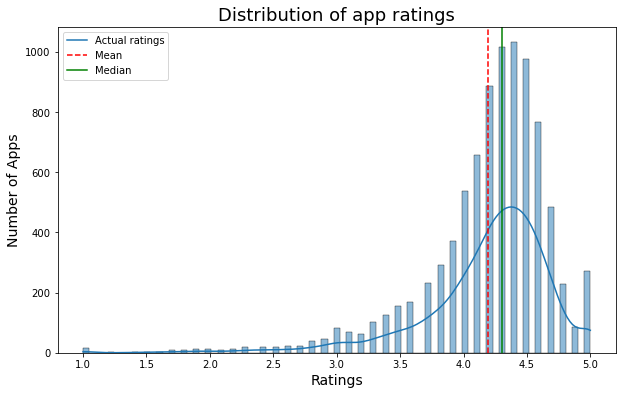

In [12]:
# Average and median rating of apps
mean=df_apps['Rating'].mean().round(2)
median=df_apps['Rating'].median().round(2)

print(f'Mean app rating = {mean}', f'Median app rating = {median}',sep= '\n')


# Distribution of apps according to their ratings
rating_histogram = sns.histplot(data = df_apps, x = "Rating", kde = True)

rating_histogram.axvline(mean, color='r', linestyle='--')
rating_histogram.axvline(median, color='g', linestyle='-')
plt.legend({'Actual ratings': rating_histogram, 'Mean':mean,'Median':median})
plt.gcf().set_size_inches( 10, 6)
plt.xlabel("Ratings", fontsize = 14)
plt.ylabel("Number of Apps", fontsize = 14)
plt.title('Distribution of app ratings', fontsize = 18)

plt.show()


Based on this data, one can infer that the average rating across all app categories is **4.19** out of **5**. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

<br></br>
<a id="3.3"></a>
### 3.3 Exploring Price Distribution and App Size


Let's now examine app sizes and app prices. 

If the mobile app's size is too large, it may be difficult and inconvenient for users to download or use it. This is especially true for parts of the world where internet speeds are relatively low due to abscence or insuficiency of 4G infrastructure. In addition, users' devices (especially of those who are tight on budget) have a very limited amount of disk space. Thus, long download or loading times might potentially turn users away before they even fully experience your mobile app. 
    
As for price, some (or even most) users expect their apps to be free or inexpensive. These is especially true if the developing world is part of your target market. Therefore, a careful pricing strategy *(that at least includes factors like customers' purchasing power and currency exchange rates)* must be implemented.

<p>Given those two constraints, the question is how can one come up with effective strategies regarding a size and price of a future app? Although the answer to this question is heavily influenced by many factors, having solid answers to the following questions will certainly help when developing such strategies:</p>

<ul>
    <li>How heavily is app size correlated with its rating? </li>
    <li>Does the price of an app affect its rating? </li>
    <li>Do users always prefer free apps over paid apps?</li>
</ul>


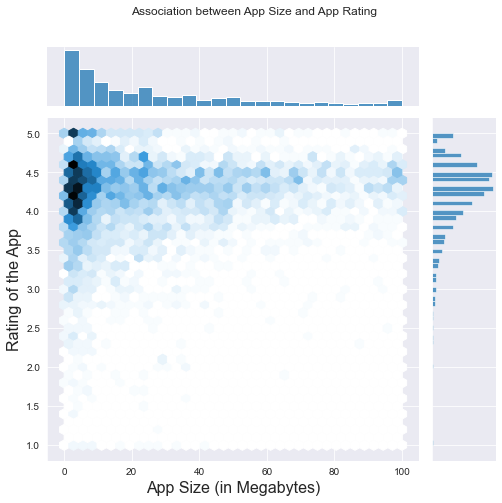

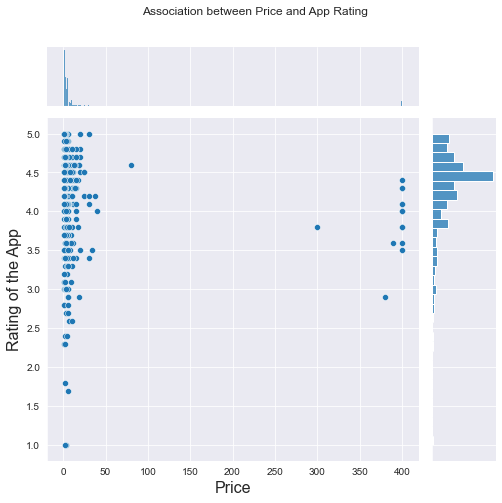

In [13]:
sns.set_style("darkgrid")

# Filter rows where both Rating and Size values are not null
apps_with_size_and_rating_present = df_apps[(~df_apps['Rating'].isnull()) & (~df_apps['Size'].isnull())]

#Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex', height = 7)
plt1.set_axis_labels('App Size (in Megabytes)', 'Rating of the App', fontsize=16)
plt.subplots_adjust(top=0.9)
plt1.fig.suptitle('Association between App Size and App Rating')


# Subset apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']
# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'], height = 7)
plt2.set_axis_labels('Price', 'Rating of the App', fontsize=16)
plt.subplots_adjust(top=0.9)
plt2.fig.suptitle('Association between Price and App Rating')
plt.show()

Findings from above suggest that the vast majority of top rated apps (with ratings over 4) range in size from 2 MB to 20 MB. Likewise, most apps are priced under **\$10**. There are however noticable anomalies in app pricing. Namely, there are too many outliers that lie far beyond the **\$100** price tag. Below I will try to explore why it is the case.

As mentioned earlier, setting a profit-maximizing price is not an easy process. Among other factors it also heavily depends on demand from consumers, competitors' prices, features offered, etc. In the previous slide I presented a relationship between a price of a paid-use only app and its rating. Based on those findings, one can infer that the majority of successful apps with ratings **4.5 or higher** charge on average around 10 USD, while almost all of them charge below 20 USD.
Although this information is useful, it only gives an overall picture. In order to be able to say if there is a substantial heterogeneity in clients' willingness to pay for apps, I will explore how prices differ accross different categories. There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. 


In [14]:
display(df_apps[(df_apps['Price'].between(50, 100))])


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2390,Language Therapy: Aphasia,MEDICAL,NaN,10,28.0,1000,Paid,74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up
9730,Lean EQ,BUSINESS,NaN,6,10.0,10,Paid,89.99,Everyone,Business,"February 14, 2017",1.0,4.1 and up


It seems like apps priced between 50 USD and 100 USD are mostly medical apps. However, they only have very few reviews and downloads, meaning that they are not commerically successful products. Now, let us look at the information about extremely expensive apps and alongside attempt to find an answer for why they are cost so much more than the average market price.

In [15]:
# Take a look at apps with unusually high prices
apps_above_100 = df_apps[['Category', 'App', 'Price', 'Rating','Reviews', 'Installs', 'Size']][df_apps['Price'] > 100]
display(apps_above_100)

,Category,App,Price,Rating,Reviews,Installs,Size
4197,FAMILY,most expensive app (H),399.99,4.3,6,100,1.50
4362,LIFESTYLE,💎 I'm rich,399.99,3.8,718,10000,26.00
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00,3.6,275,10000,7.30
5351,LIFESTYLE,I am rich,399.99,3.8,3547,100000,1.80
5354,FAMILY,I am Rich Plus,399.99,4.0,856,10000,8.70
5355,LIFESTYLE,I am rich VIP,299.99,3.8,411,10000,2.60
5356,FINANCE,I Am Rich Premium,399.99,4.1,1867,50000,4.70
5357,LIFESTYLE,I am extremely Rich,379.99,2.9,41,1000,2.90
5358,FINANCE,I am Rich!,399.99,3.8,93,1000,22.00
5359,FINANCE,I am rich(premium),399.99,3.5,472,5000,0.96


Apparently, all those super-expensive apps are **"spams"** (if this word is applicable to mobile apps) and thus should not be taken seriously at all. Hence, I will filter them out from the further analysis.

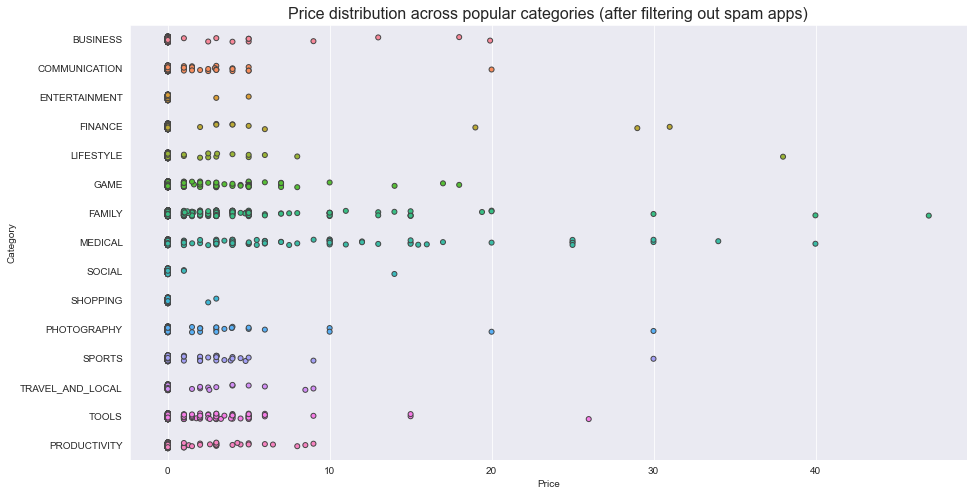

In [16]:
# Select a set of popular app categories
popular_app_categories = df_apps[df_apps.Category.isin(['GAME', 'COMMUNICATION', 'SOCIAL', 'PRODUCTIVITY', 'TOOLS',
                                                        'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TRAVEL_AND_LOCAL','FINANCE',
                                                        'LIFESTYLE','BUSINESS', 'SHOPPING', 'SPORTS', 'ENTERTAINMENT'])]


apps_under_50 = popular_app_categories[popular_app_categories['Price']<=50]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the commercial apps 
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_50,
                   jitter=True, linewidth=1)
ax.set_title('Price distribution across popular categories (after filtering out spam apps)', fontsize = 16)
plt.show()

Based on the output of the *Strip Plot* from above, one can conclude that apps in **Medical** and **Family** category have the highest spread in prices. On the other hand, **Entertainment, Shopping** and **Social** type apps have the lowest spread.  Interestingly, no game app costs more than \$20.

Finally, let's explore to what extent are all those variables (**Price, Rating, Installs, Size**) are correlated with each other. For this purpose I will plot a correlation matrix

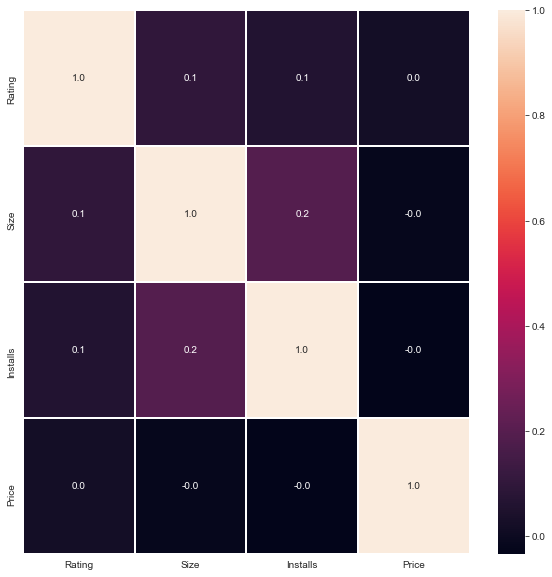

In [17]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(apps_under_50.corr(), annot=True, linewidths=.9, fmt= '.1f',ax=ax)
plt.show()

Apparently, when taken as a whole, none of the factors are significantly correlated with each other. Although, there might be some *heterogeneity* on sub-group level, I will not check its presence here, since otherwise the project will become too long. Those who are intersted about the topic, can learn more about it [here](https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.)

<br></br>
<a id="3.4"></a>
### 3.4 Paid vs. Free Apps


As the next logical step, let us examine whether there is a significant difference in popularities between free and paid apps. Despite having zero price tag, free apps can still generate revenues for their developers through advertisements. However, free apps also heavily serve as a tool for customer retention and attraction. Oftentimes being part of an ecosystem, free apps serve as an extension of other products, theat are meant to be purchased by customers in the future.

Here, our goal is to attempt to answer the following common-sense questions:

<ul>
    <li>Is it the case that in Android world paid apps are (on average) demanded as much as free apps are? If not, how big is the divergence?</li>
    
   <li>Do commercial mobile apps receive higher ratings when compared to free apps in the same category? </li>
</ul>
  



In [18]:
import plotly
import plotly.express as px
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

installs_of_paid_apps = go.Box(
    # Data for paid apps
    y=df_apps[df_apps['Type'] == 'Paid']['Installs'],
    name = 'Commercial Apps'
)

installs_of_free_apps = go.Box(
    # Data for free apps
    y=df_apps[df_apps['Type'] == 'Free']['Installs'],
    name = 'Free Apps'
)

layout = go.Layout(
    title = "Total number of downloads for paid vs. free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

plotly.offline.iplot({'data': [installs_of_paid_apps, installs_of_free_apps], 'layout': layout})

In [19]:
fig = px.box(apps_under_50.dropna(subset = ['Rating']), ## Drop those rows, where rating is unknown.
             y="Rating", 
             color="Type",
             title ='Is there a heterogeneity in ratings accross the most popular categories?')
fig.update_traces() 
fig.show()

Not surprisingly, data shows that as an overall rule, paid apps are demanded in a significantly lower qunatities (100 times!!!) compared to free apps.

Furthermore, as the last boxplot indicates, when we restrict our attention to the most popular mobile app categories, the average difference in ratings between free and commercial apps is close to zero. However, quite noticeably, free apps as a rule tend to have too many outliers on the bottom side of a rating. On the other hand, dispersion in rating for paid (commercial) apps is considerably lower.

In the next (final) section I will upload the second <code>.csv</code> file in order to visually demonstrate the spread or variance (a.k.a *polarity*) in consumers' feelings about apps. If polarity is high, it means that there are a lot both very positive and very negative. If polarity is low, it is just the other way around. 

<br></br>
<a id="3.5"></a>
### 3.5 Sentiment Analysis of User Reviews

In [20]:
#Load user_reviews.csv dataset and merge two dataframes
df_reviews = pd.read_csv('datasets/user_reviews.csv', usecols = ['App', 'Sentiment', 'Sentiment_Polarity'])
df_reviews = df_reviews.dropna()
merged_df = pd.merge(df_apps, df_reviews, on = 'App', how = "inner")

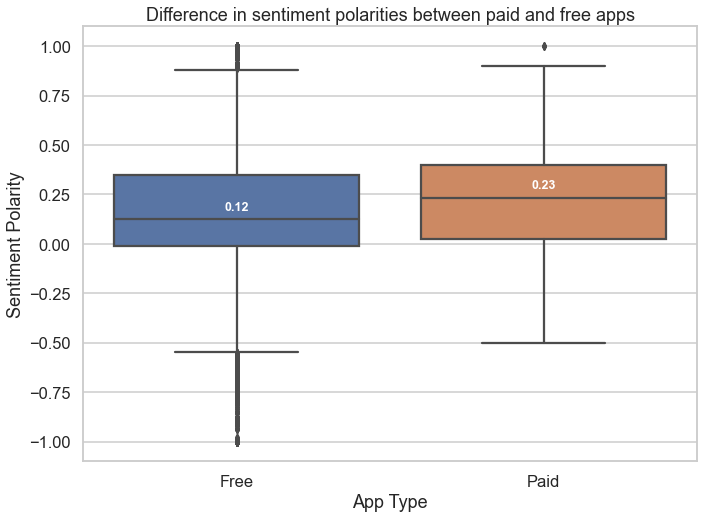

In [21]:
# Define an overall outlook of a box plot
sns.set('talk')
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Difference in sentiment polarities between paid and free apps')
plt.xlabel('App Type')
plt.ylabel('Sentiment Polarity')


# Display median values on the box plot
median_values = merged_df.groupby(['Type'])['Sentiment_Polarity'].median().round(2)
vertical_offset = merged_df['Sentiment_Polarity'].median() * 0.4 # offset from median for a correct display on plot

for xtick in ax.get_xticks():
    ax.text(xtick, median_values[xtick] + vertical_offset, median_values[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
plt.show()

As one can clearly see, free apps on average tend to:
<ol>
  <li> Have a lower number of positive reviews than paid (commercial) apps </li> 
  <li> Receive extremely negative comments at a significantly higher rate(as indicated by a continous line of outliers)</li>
</ol>

On the other hand, paid apps receive significantly less negative reviews and do on average receive a higher number of positive comments. This goes in line with the findings regarding app rating in the last section.



<br/>

### Conclusion

Finally, I would like to say that in this project I worked with the data about Google Play Store apps that obtained from Kaggle through its API.  My intention here was to attempt to answer a set of common-sense questions that I believe everyone conducting a market research would probably ask. Although the analysis done above was not very deep and rigorous, obtained results and findings can still be informative for those who would like to know what the situation in Android app market looks like.

